In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import img_to_array, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array

In [2]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [3]:
from sklearn.utils import shuffle
df_train = pd.read_csv("final_code_ds.csv")
df_train = shuffle(df_train)
print(df_train.shape)
print(df_train[:10])

(124653, 2)
                                              Path  ClassId
93946                Train/5/00005_00002_00012.png        5
95061                Train/5/00005_00039_00017.png        5
71485      Train_light/RedROI1/RN_1/image.7719.jpg       60
66542      Train_light/RedROI1/RN_1/image.2776.jpg       60
1643    Train_light/GreenROI1/GAF_1/image.1644.jpg       43
32807   Train_light/GreenROI3/GN_3/image.03858.jpg       52
58053     Train_light/RedROI1/RAL_1/image.0269.jpg       58
92554                Train/4/00004_00022_00000.png        4
79645      Train_light/RedROI3/RN_3/image.1821.jpg       63
100537              Train/10/00010_00002_00003.png       10


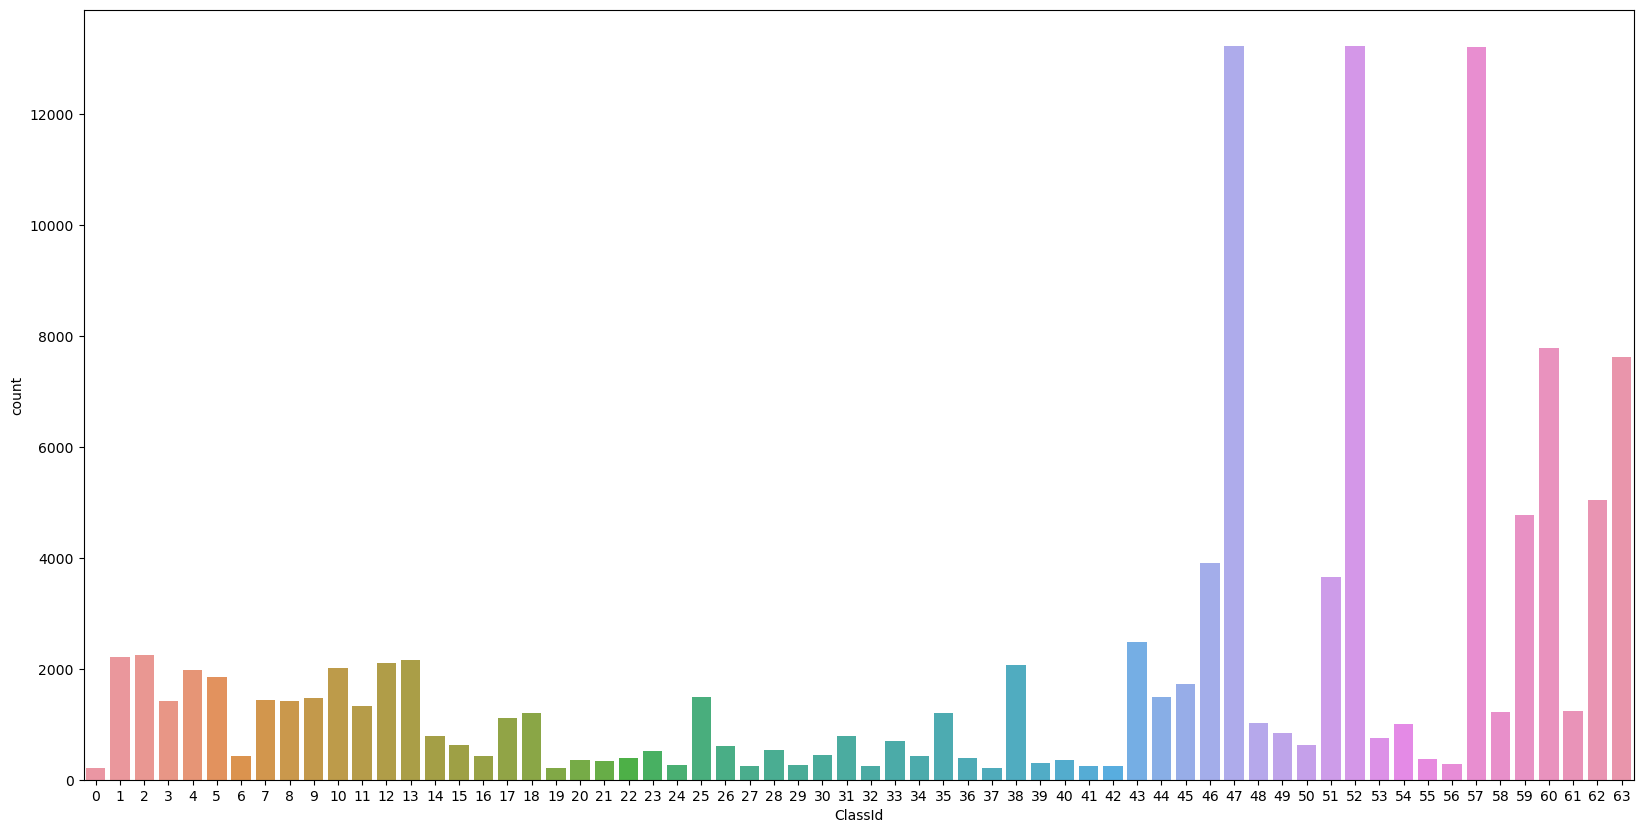

In [4]:
import seaborn as sns
#ds = sns.load_dataset("final_code_ds.csv")
plt.figure(figsize=(20,10))
sns.countplot(x='ClassId', data = df_train)
plt.show()

In [5]:
df_train_full=df_train
df_train = pd.Series(df_train['ClassId'])
print(df_train[:10])

93946      5
95061      5
71485     60
66542     60
1643      43
32807     52
58053     58
92554      4
79645     63
100537    10
Name: ClassId, dtype: int64


In [6]:
from keras.utils import np_utils as nu

#print("Number of classes before : "+ str(y_train.shape[1]))
df_train=nu.to_categorical(df_train)

print("Number of classes and labels : " + str(df_train.shape))
num_classes=df_train.shape[1]
print(df_train[0])

Number of classes and labels : (124653, 64)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
im_size1 = 786
im_size2 = 786
x_train = []
y_train = []

In [8]:
df_test = df_train_full[:] #change number of data
#df_test = pd.read_csv("/Users/Medha Singh/Downloads/mdd/GTSRB/gtsrb_img/Test.csv")
print(df_test['Path'])

93946                  Train/5/00005_00002_00012.png
95061                  Train/5/00005_00039_00017.png
71485        Train_light/RedROI1/RN_1/image.7719.jpg
66542        Train_light/RedROI1/RN_1/image.2776.jpg
1643      Train_light/GreenROI1/GAF_1/image.1644.jpg
                             ...                    
54337     Train_light/GreenROI4/GN_4/image.09766.jpg
49078     Train_light/GreenROI4/GN_4/image.04507.jpg
115399                Train/25/00025_00049_00015.png
81722        Train_light/RedROI3/RN_3/image.3898.jpg
31733     Train_light/GreenROI3/GN_3/image.02784.jpg
Name: Path, Length: 124653, dtype: object


In [9]:
i=0
for pth in tqdm(df_test['Path']):
    try:
        #print(pth)
        img = cv2.imread(('/Users/Medha Singh/Downloads/mdd/GTSRB/Major_Final_Code/{}'.format(pth)))
        #print(img)
        img_scaled = cv2.resize(img, (48,48), interpolation = cv2.INTER_AREA)
        #arr = image.img_to_array(img)
        label = df_train[i]
        x_train.append(img_scaled)
        y_train.append(label)
            #print(label)
            #cv2.imwrite(("/Users/shubh/Desktop/Final Project/Code and Dataset/resized_train/resized_train_processed/" + f +'.jpeg'),img_scaled)
        i += 1 
    except:
        print('error')

100%|██████████| 124653/124653 [14:35<00:00, 142.38it/s]


In [10]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
print(x_train.shape)
print(y_train.shape)

(124653, 48, 48, 3)
(124653, 64)


In [11]:
img_rows = 48
img_cols = 48
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,3)

#the shape of a single image to feed to 1st layer of CNN
input_shape=(img_rows,img_cols,3)

#convert to float 32 as CNN requires float 32 data
x_train=x_train.astype('float32')
#x_test=x_test.astype('float32')

#normalize
x_train/=255
#x_test/=255


print("shape of the data now : " + str(x_train.shape))
print("height of training data : "+ str(x_train[1].shape[0]))
#print(x_train)

shape of the data now : (124653, 48, 48, 3)
height of training data : 48


In [12]:
print(x_train[0].shape)
print("Number of images in the training labels : " + str(len(y_train))+"\nNumber of images in the training images : "+str(len(x_train)))


(48, 48, 3)
Number of images in the training labels : 124653
Number of images in the training images : 124653


In [13]:
x_test = []
y_test = []
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
print("shape of the data now : " + str(Y_train.shape))

shape of the data now : (99722, 64)


In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
#K.set_image_data_format('channels_first')


def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=input_shape,
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [18]:
from keras.optimizers import SGD

model = cnn_model()

# let's train the model using SGD + momentum
lr = 0.01
sgd = SGD(learning_rate=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        36928     
                                                        

In [19]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint


def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

with tf.device('/device:GPU:0'):    
    history = model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1,validation_split=0.2,
          callbacks=[LearningRateScheduler(lr_schedule)])


Epoch 1/20
2494/2494 [==============================] - 409s 164ms/step - loss: 1.1861 - accuracy: 0.6333 - val_loss: 0.5264 - val_accuracy: 0.8234 - lr: 0.0100
Epoch 2/20
2494/2494 [==============================] - 421s 169ms/step - loss: 0.4387 - accuracy: 0.8528 - val_loss: 0.2177 - val_accuracy: 0.9287 - lr: 0.0100
Epoch 3/20
2494/2494 [==============================] - 431s 173ms/step - loss: 0.2668 - accuracy: 0.9099 - val_loss: 0.1897 - val_accuracy: 0.9363 - lr: 0.0100
Epoch 4/20
2494/2494 [==============================] - 421s 169ms/step - loss: 0.2127 - accuracy: 0.9285 - val_loss: 0.1441 - val_accuracy: 0.9490 - lr: 0.0100
Epoch 5/20
2494/2494 [==============================] - 390s 156ms/step - loss: 0.1859 - accuracy: 0.9373 - val_loss: 0.1178 - val_accuracy: 0.9608 - lr: 0.0100
Epoch 6/20
2494/2494 [==============================] - 381s 153ms/step - loss: 0.1720 - accuracy: 0.9416 - val_loss: 0.1018 - val_accuracy: 0.9648 - lr: 0.0100
Epoch 7/20
2494/2494 [============

In [20]:
import pickle 
pickle_out= open("mg.pkl","wb")  
pickle.dump(model,pickle_out)
pickle_out.close()
cv2.waitKey(0)
#import tensorflow_text as text


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\conv2d_5
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                        

-1

  Using cached tensorflow-2.11.0-cp37-cp37m-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl (266.3 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.10.0 requires tensorflow<2.11,>=2.10.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.11.0 which is incompatible.


In [21]:
score=model.evaluate(X_valid, Y_valid, verbose=0)
print('loss= ' + str(score[0]))
print('accuracy= ' + str(score[1]))

loss= 0.05402139574289322
accuracy= 0.9831535220146179


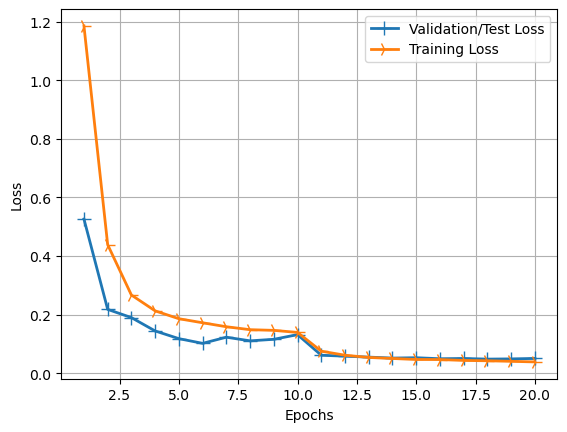

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

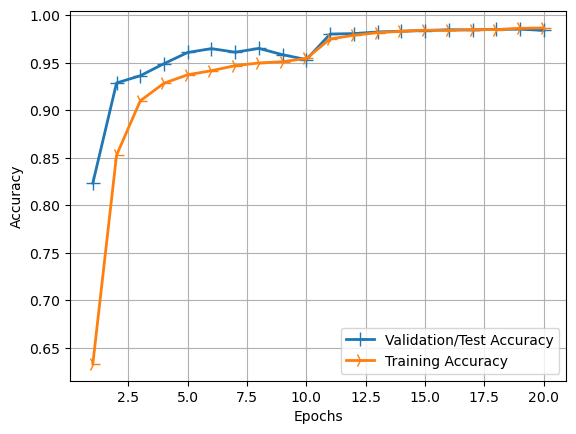

In [23]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_valid), axis=-1)

print(classification_report(np.argmax(Y_valid,axis=1), y_pred))
print(confusion_matrix(np.argmax(Y_valid,axis=1), y_pred))

780/780 [==============================] - 19s 24ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       453
           2       1.00      1.00      1.00       443
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       392
           5       0.99      0.99      0.99       367
           6       1.00      1.00      1.00        67
           7       0.99      1.00      0.99       311
           8       1.00      0.99      0.99       278
           9       1.00      1.00      1.00       293
          10       1.00      1.00      1.00       410
          11       1.00      1.00      1.00       271
          12       1.00      0.99      1.00       431
          13       1.00      1.00      1.00       447
          14       1.00      1.00      1.00       156
          15       1.00      1.00      1.00       134
          16       0.99 

In [25]:
import cv2
import numpy as np
from keras.datasets import mnist

# loads the MNIST dataset
#(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(np.argmax(Y_valid,axis=1) - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications
print("Indices of misclassifed data are: \n\n" + str(result_indices))

Indices of misclassifed data are: 

(array([   33,   202,   244,   453,   478,   499,   566,   652,   702,
         711,   751,   794,   797,   803,   829,   974,   982,  1093,
        1196,  1213,  1228,  1295,  1387,  1439,  1458,  1499,  1700,
        1797,  1817,  1837,  1898,  1924,  1974,  2091,  2217,  2294,
        2346,  2357,  2398,  2428,  2492,  2497,  2503,  2577,  2646,
        2663,  2683,  2705,  2867,  2906,  2964,  3016,  3157,  3208,
        3209,  3606,  3612,  3710,  3743,  3818,  3821,  3927,  3956,
        3980,  4084,  4143,  4173,  4191,  4399,  4409,  4417,  4427,
        4483,  4493,  4531,  4654,  4740,  4758,  4760,  4799,  4849,
        4888,  4959,  5033,  5074,  5126,  5130,  5156,  5171,  5327,
        5378,  5496,  5528,  5687,  5712,  5735,  5893,  5906,  5972,
        5992,  6072,  6096,  6156,  6253,  6297,  6308,  6398,  6794,
        6817,  6861,  6948,  6979,  7043,  7050,  7171,  7210,  7273,
        7296,  7339,  7346,  7382,  7477,  7576,  759

In [26]:
import cv2 
#from keras.models import load_model

#classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
   # expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,30):

    input_im = X_valid[result_indices[0][i]]
    #print(y_test[result_indices[0][i]])
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,48,48,3) 
    
    ## Get Prediction
    Y_show=np.argmax(Y_valid,axis=1)
    

    res = str(np.argmax(model.predict(input_im, 1, verbose = 0)[0]))
    draw_test("Prediction", res, imageL, Y_show[result_indices[0][i]]) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [66]:
import pickle

In [68]:
pickle.dump(model, open('sk.p', 'wb'))


INFO:tensorflow:Assets written to: ram://d9b4409a-9988-4706-8e0b-6a8305de5db5/assets


INFO:tensorflow:Assets written to: ram://d9b4409a-9988-4706-8e0b-6a8305de5db5/assets
